# Introduction to the Job Shop Scheduling Problem

The Job Shop Scheduling Problem (JSSP) is a classic optimization problem in operations research and computer science. It involves scheduling jobs on machines with the goal of optimizing a certain objective, such as minimizing the total time required to complete all jobs. We'll create a simple example with three jobs and three machines and demonstrate how to solve this problem using Google's Operations Research tools, specifically the OR-Tools package.

### What is the Job Shop Scheduling Problem?
The Job Shop Scheduling Problem is a fundamental and highly studied problem in operations research and computer science, with its origins tracing back to the mid-20th century. Historically, the JSSP emerged from the need to optimize manufacturing and production processes, especially in the context of increasing industrialization and the growing complexity of manufacturing systems.

The problem itself involves scheduling a set of jobs $J$, each consisting of a sequence of operations ${O_1, O_2, ..., O_n}$, on a set of machines $M$. Each job has a specific order in which its operations need to be processed, and each operation requires a specific machine for a certain duration. The complexity arises from constraints: no machine can process more than one operation at a time, and once a operation is started, it must run to completion without interruption.

### Example
Let's consider a small instance with three jobs and three machines. The jobs have different tasks, each requiring a specific machine and processing time:

- Job 1: Task 1 (Machine 1, 3 units), Task 2 (Machine 2, 2 units), Task 3 (Machine 3, 2 units)
- Job 2: Task 1 (Machine 3, 4 units), Task 2 (Machine 1, 1 unit)
- Job 3: Task 1 (Machine 2, 5 units), Task 2 (Machine 3, 3 units)

To represent this problem in Python, we can import `JobShopInstance` and `Operation` classes from our source code. This can be done installing the package locally with `pip install $PROJECT_PATH -e`. This is done automatically for you as a post command if you are using the provided Dev Container. The flag `-e` allows us to edit the package without the need to install it again.

In [1]:
from gnn_scheduler.jssp import Operation, JobShopInstance

jobs = [
    [Operation(machine_id=0, duration=3), Operation(1, 2), Operation(2, 2)],
    [Operation(2, 4), Operation(0, 1)],
    [Operation(1, 5), Operation(2, 3)],
]

# We can now create a `JobShopInstance` object from this list of jobs:
jssp = JobShopInstance(jobs, name="Example")

The number of jobs and machines can be accessed via the `n_jobs` and `n_machines` attributes that are automatically computed.

In [2]:
jssp.n_jobs, jssp.n_machines

(3, 3)

Additionally, if we know the actual optimum value of the problem, we could set it. If not provided it is left to None. Similarly, We could also set information about the lower and upper bounds of the solution. Usually, if the optimum value is known the bounds are set to `None`.

In [3]:
jssp.optimum, jssp.lower_bound, jssp.upper_bound

(None, None, None)

### Representing the Problem as a Graph

The disjunctive graph is created by first adding nodes representing each operation in the jobs, along with two special nodes: a source $S$ and a sink $T$. Each operation node is linked to the next operation in its job sequence by **conjunctive edges**, forming a path from the source to the sink. These edges represent the order in which operations of a single job must be performed.

Additionally, the graph includes **disjunctive edges** between operations that use the same machine but belong to different jobs. These edges are bidirectional, indicating that either of the connected operations can be performed first. The disjunctive edges thus represent the scheduling choices available: the order in which operations sharing a machine can be processed. Solving the Job Shop Scheduling problem involves choosing a direction for each disjunctive edge such that the overall processing time is minimized.

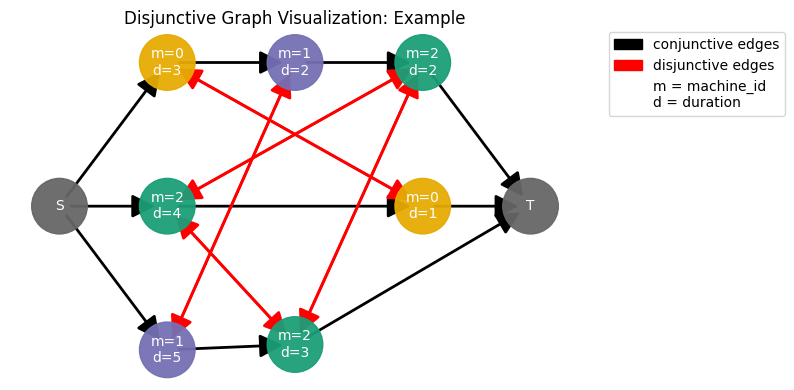

In [4]:
jssp.plot_disjunctive_graph(figsize=(6, 4));

### Loading Instances
The most common way to use this class is by loading an already defined instance from a file. These files are located inside `$PROJECT_PATH/data/instances` and have no extension. Here is how one of those files looks like:

```
#+++++++++++++++++++++++++++++
# instance ft06
#+++++++++++++++++++++++++++++
# Fisher and Thompson 6x6 instance, alternate name (mt06)
6 6
2  1  0  3  1  6  3  7  5  3  4  6
1  8  2  5  4 10  5 10  0 10  3  4
2  5  3  4  5  8  0  9  1  1  4  7
1  5  0  5  2  5  3  3  4  8  5  9
2  9  1  3  4  5  5  4  0  3  3  1
1  3  3  3  5  9  0 10  4  4  2  1
```
This file definition for a job-shop instance is known as the Taillard specification. The first non-commented row indicates the number of jobs and machines respectively. Each subsequent row is formed by a sequence of number pairs.

In [5]:
from gnn_scheduler import get_project_path

PROJECT_PATH = get_project_path()
PROJECT_PATH

PosixPath('/workspaces/gnn_scheduler')

**Note:** in order of the `get_project_path()` funtion to work, creating a `.env` file and defining a variable called `PROJECT_PATH` is required. For example, if you are working inside the Dev Container you should make sure you have `PROJECT_PATH = "/workspaces/gnn_scheduler"` inside the `.env`, which is located in the project path.

Now, we can load the above instance:

In [6]:
from gnn_scheduler.jssp import load_from_file

DATA_PATH = PROJECT_PATH / "data"
INSTANCE_PATH = DATA_PATH / "raw" / "ft06"
ft06_instance = load_from_file(INSTANCE_PATH, name="ft06")

FileNotFoundError: [Errno 2] No such file or directory: '/workspaces/gnn_scheduler/data/raw/ft06'

In [ ]:
ft06_instance.n_jobs, ft06_instance.n_machines

(6, 6)

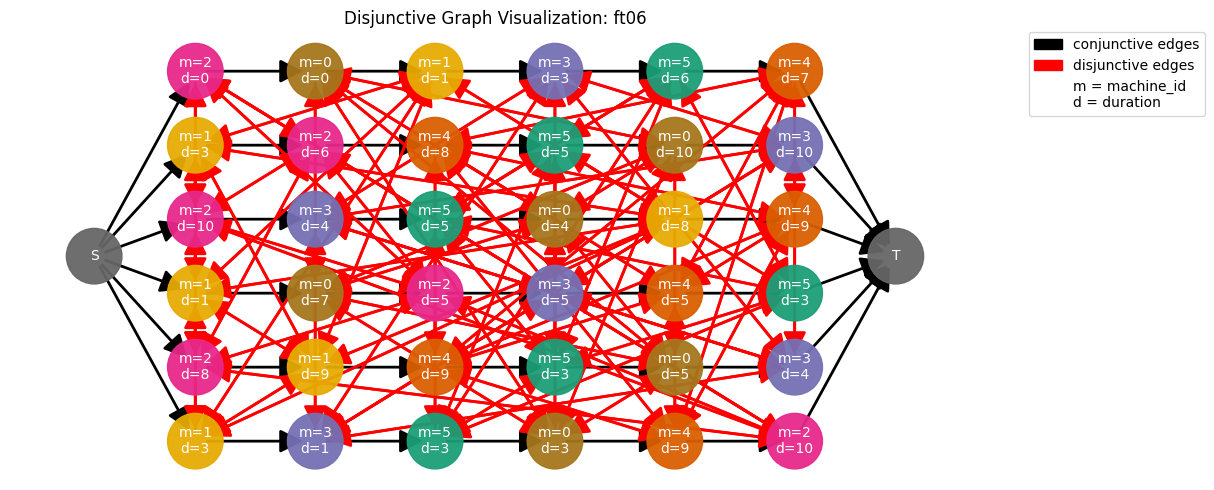

In [ ]:
ft06_instance.plot_disjunctive_graph(figsize=(10, 5));

In order to access to the metadata of this instance such as its optimum value, we can use the `load_metadata` function. If no path is provided, it will call to the `get_project_path` function.

In [ ]:
from gnn_scheduler.jssp import load_metadata

metadata = load_metadata()

This metadata variable now contains the content of `$PROJECT_PATH/data/instances.json`, which is a list of dictionaries with the metadata of each instance:

In [ ]:
ft06_metadata = None
for instance_metadata in metadata:
    if instance_metadata["name"] == "ft06":
        ft06_metadata = instance_metadata
        break

ft06_metadata

{'name': 'ft06', 'jobs': 6, 'machines': 6, 'optimum': 55, 'path': 'raw/ft06'}

We also can simply load each file with the method `.from_benchmark`. Again, if no path is provided, it will call the to the `get_project_path` function, so it uses `get_project_path() / data` as the default path.

In [ ]:
from gnn_scheduler.jssp import load_from_benchmark

abz5_instance = load_from_benchmark("abz5")

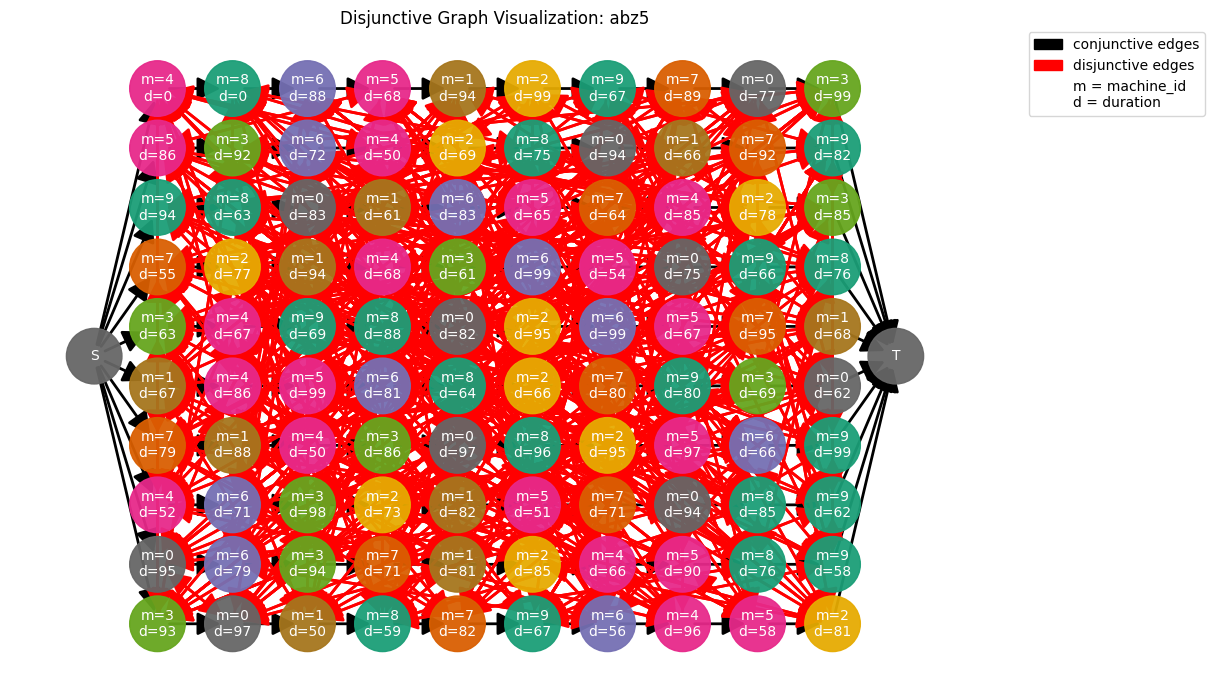

In [ ]:
abz5_instance.plot_disjunctive_graph(figsize=(10, 7));

One advantage of loading the instance this way is that we gain access automatically to attributes such as the optimum.

In [ ]:
abz5_instance.optimum

1234

We can even load all instances at once with the method `load_all_from_benchmark`.

In [ ]:
from gnn_scheduler.jssp import load_all_from_benchmark

all_instances = load_all_from_benchmark()
len(all_instances)

162

Load time is reduced because the `disjunctive_graph` attribute is only computed when used the first time.

In [ ]:
graphs = [instance.disjunctive_graph for instance in all_instances]

That's the reason loading all instances took 0.1 seconds, while the above cell took around 3 seconds to execute. The second time we execute the same code, it does it almost instantly (2 ms):

In [ ]:
graphs = [instance.disjunctive_graph for instance in all_instances]